In [1]:
ROBBER = "R"
POLICE = "P"
BANK = "B"
EMPTY = "*"

grid = [
    [ROBBER,EMPTY,EMPTY,EMPTY],
    [EMPTY,BANK,EMPTY,EMPTY],
    [EMPTY,EMPTY,EMPTY,EMPTY],
    [EMPTY,EMPTY,EMPTY, POLICE]
]

for row in grid:
    print(' '.join(row))


R * * *
* B * *
* * * *
* * * P


In [2]:
class State:
    
    def __init__(self, grid, robber_pos, police_pos):
        self.grid = grid
        self.robber_pos = robber_pos
        self.police_pos = police_pos
        
    def __eq__(self, other):
        return isinstance(other, State) and self.grid == other.grid and self.robber_pos == other.robber_pos #\
                #and self.police_pos == other.police_pos
    
    def __hash__(self):
        return hash(str(self.grid) + str(self.robber_pos))# + str(self.police_pos))
    
    def __str__(self):
        return f"State(grid={self.grid}, robber_pos={self.robber_pos})"#", police_pos={self.police_pos})"
    

In [3]:
STAY = 0
UP = 1
DOWN = 2 
LEFT = 3
RIGHT = 4

ACTIONS = [STAY, UP, DOWN, LEFT, RIGHT]

REWARD_BANK = 1
REWARD_EMPTY = -1
REWARD_CAUGHT = -10

START_ROBBER = [0,0]
START_POLICE = [3,3]


In [4]:
start_state = State(grid=grid, robber_pos=START_ROBBER, police_pos=START_POLICE)
print(start_state.grid[0][0])

R


In [5]:
from copy import deepcopy

def act(state,action_robber,action_police):
    # state_actor_pos = state.robber_pos for robber or state.police_pos
    def new_actor_pos(state,state_actor_pos,action):
        p = deepcopy(state_actor_pos)
        if action == UP:
            print('UP')
            p[0] = max(0,p[0]-1)
        elif action == DOWN:
            print('down')
            p[0] = min(len(state.grid)-1, p[0]+1)
        elif action == LEFT:
            print('LEFT')
            p[1] = max(0, p[1]-1)
        elif action == RIGHT:
            print('RIGHT')
            p[1] = min(len(state.grid[0])-1, p[1]+1)
        elif state_actor_pos == deepcopy(state.robber_pos):
            if action == STAY:
                print('STAY')
                p = p
            else:
                print('error robber')
                raise ValueError(f"Unknown action {action}")
        else:
            print('error police')
            raise ValueError(f"Unknown action {action}")
        return p
    
    pos_robber = new_actor_pos(state,state.robber_pos,action_robber)
    pos_police = new_actor_pos(state,state.police_pos,action_police)
    
    new_grid = deepcopy(state.grid)
    
    old_pos_robber = state.robber_pos
    old_pos_police = state.police_pos
    
    grid_item_robber = state.grid[pos_robber[0]][pos_robber[1]]
    grid_item_police = state.grid[pos_police[0]][pos_police[1]]
    old_grid_item_robber = state.grid[old_pos_robber[0]][old_pos_robber[1]]
    old_grid_item_police = state.grid[old_pos_police[0]][old_pos_police[1]]
    
    if pos_robber == pos_police:
        print('1')
        print('OVER')
        reward = REWARD_CAUGHT
        is_over = False
        if not old_pos_robber == pos_robber:
            if old_grid_item_robber == BANK+ROBBER:
                new_grid[old_pos_robber[0]][old_pos_robber[1]] = BANK
                new_grid[pos_robber[0]][pos_robber[1]] = ROBBER
            elif grid_item_robber == BANK:
                new_grid[old_pos_robber[0]][old_pos_robber[1]] = EMPTY
                new_grid[pos_robber[0]][pos_robber[1]] = BANK+ROBBER 
            else:
                new_grid[old_pos_robber[0]][old_pos_robber[1]] = EMPTY
                new_grid[pos_robber[0]][pos_robber[1]] = ROBBER
        if old_pos_robber == pos_robber:
            print('balla')
            if old_grid_item_robber == BANK+ROBBER:
                new_grid[pos_robber[0]][pos_robber[1]] = BANK+ROBBER
            else:
                new_grid[pos_robber[0]][pos_robber[1]] = ROBBER
        if old_grid_item_police == BANK+POLICE:
            new_grid[old_pos_police[0]][old_pos_police[1]] = BANK
            new_grid[pos_police[0]][pos_police[1]] += POLICE
        else:
            new_grid[old_pos_police[0]][old_pos_police[1]] = EMPTY
            new_grid[pos_police[0]][pos_police[1]] += POLICE
            
    elif old_pos_robber == old_pos_police:
        print('2')
        reward = REWARD_EMPTY
        is_over = True
        if old_grid_item_robber == BANK+ROBBER+POLICE:
            new_grid[old_pos_robber[0]][old_pos_robber[1]] = BANK
        else:
            new_grid[old_pos_robber[0]][old_pos_robber[1]] = EMPTY
        new_grid[START_ROBBER[0]][START_ROBBER[1]] = ROBBER
        new_grid[START_POLICE[0]][START_POLICE[1]] = POLICE
        pos_police = START_POLICE
        pos_robber = START_ROBBER
        new_grid = deepcopy(start_state.grid)
    
    elif pos_robber == old_pos_police and pos_police == old_pos_robber:
        print('3')
        if grid_item_robber == BANK+POLICE:
            reward = REWARD_BANK
            is_over = False
            new_grid[old_pos_robber[0]][old_pos_robber[1]] = POLICE
            new_grid[old_pos_police[0]][old_pos_police[1]] = BANK+ROBBER
        elif grid_item_police == BANK+ROBBER:
            reward = REWARD_EMPTY
            is_over = False
            new_grid[old_pos_robber[0]][old_pos_robber[1]] = BANK+POLICE
            new_grid[old_pos_police[0]][old_pos_police[1]] = ROBBER
        else:
            reward = REWARD_EMPTY
            is_over = False
            new_grid[old_pos_robber[0]][old_pos_robber[1]] = POLICE
            new_grid[old_pos_police[0]][old_pos_police[1]] = ROBBER
    
    elif pos_police == old_pos_robber and pos_robber != old_pos_police:
        print('4')
        if old_grid_item_police == BANK+POLICE:
            reward = REWARD_EMPTY
            is_over = False
            new_grid[old_pos_police[0]][old_pos_police[1]] = BANK
            new_grid[pos_police[0]][pos_police[1]] = POLICE
            new_grid[pos_robber[0]][pos_robber[1]] = ROBBER
        elif old_grid_item_robber == BANK+ROBBER:
            reward = REWARD_EMPTY
            is_over = False
            new_grid[old_pos_police[0]][old_pos_police[1]] = EMPTY
            new_grid[pos_police[0]][pos_police[1]] = BANK+POLICE
            new_grid[pos_robber[0]][pos_robber[1]] = ROBBER
        elif grid_item_robber == BANK:
            reward = REWARD_BANK
            is_over = False
            new_grid[old_pos_police[0]][old_pos_police[1]] = EMPTY
            new_grid[pos_police[0]][pos_police[1]] = POLICE
            new_grid[pos_robber[0]][pos_robber[1]] = BANK+ROBBER
        else:
            reward = REWARD_EMPTY
            is_over = False
            new_grid[old_pos_police[0]][old_pos_police[1]] = EMPTY
            new_grid[pos_police[0]][pos_police[1]] = POLICE
            new_grid[pos_robber[0]][pos_robber[1]] = ROBBER
    
    elif pos_robber == old_pos_police and pos_police != old_pos_robber:
        print('5')
        if old_grid_item_robber == BANK+ROBBER:
            reward = REWARD_EMPTY
            is_over = False
            new_grid[old_pos_robber[0]][old_pos_robber[1]] = BANK
            new_grid[pos_robber[0]][pos_robber[1]] = ROBBER
            new_grid[pos_police[0]][pos_police[1]] = POLICE
        elif old_grid_item_police == BANK+POLICE:
            reward = REWARD_BANK
            is_over = False
            new_grid[old_pos_robber[0]][old_pos_robber[1]] = EMPTY
            new_grid[pos_robber[0]][pos_robber[1]] = BANK+ROBBER
            new_grid[pos_police[0]][pos_police[1]] = POLICE
        elif grid_item_police == BANK:
            reward = REWARD_EMPTY
            is_over = False
            new_grid[old_pos_robber[0]][old_pos_robber[1]] = EMPTY
            new_grid[pos_robber[0]][pos_robber[1]] = ROBBER
            new_grid[pos_police[0]][pos_police[1]] = BANK+POLICE
        else:
            reward = REWARD_EMPTY
            is_over = False
            new_grid[old_pos_robber[0]][old_pos_robber[1]] = EMPTY
            new_grid[pos_robber[0]][pos_robber[1]] = ROBBER
            new_grid[pos_police[0]][pos_police[1]] = POLICE
        
    else:
        print('6')
        if grid_item_police == BANK:
            print("Polis bank")
            reward = REWARD_EMPTY
            is_over = False
            new_grid[pos_police[0]][pos_police[1]] = BANK+POLICE
            new_grid[old_pos_police[0]][old_pos_police[1]] = EMPTY
            new_grid[pos_robber[0]][pos_robber[1]] = ROBBER
            if old_pos_robber != pos_robber:
                new_grid[old_pos_robber[0]][old_pos_robber[1]] = EMPTY
        elif grid_item_robber == BANK:
            reward = REWARD_BANK
            is_over = False
            new_grid[pos_robber[0]][pos_robber[1]] = BANK+ROBBER
            new_grid[old_pos_robber[0]][old_pos_robber[1]] = EMPTY
            new_grid[pos_police[0]][pos_police[1]] = POLICE
            new_grid[old_pos_police[0]][old_pos_police[1]] = EMPTY
        elif grid_item_robber == BANK+ROBBER:
            reward = REWARD_BANK
            is_over = False
            new_grid[pos_robber[0]][pos_robber[1]] = BANK+ROBBER
            new_grid[pos_police[0]][pos_police[1]] = POLICE
            new_grid[old_pos_police[0]][old_pos_police[1]] = EMPTY
        elif old_grid_item_police == BANK+POLICE:
            reward = REWARD_EMPTY
            is_over = False
            new_grid[pos_police[0]][pos_police[1]] = POLICE
            new_grid[old_pos_police[0]][old_pos_police[1]] = BANK
            new_grid[pos_robber[0]][pos_robber[1]] = ROBBER
            if old_pos_robber != pos_robber:
                new_grid[old_pos_robber[0]][old_pos_robber[1]] = EMPTY
        elif grid_item_robber == ROBBER:
            print('HÄÄR')
            reward = REWARD_EMPTY
            is_over = False
            new_grid[pos_robber[0]][pos_robber[1]] = ROBBER
            new_grid[pos_police[0]][pos_police[1]] = POLICE
            new_grid[old_pos_police[0]][old_pos_police[1]] = EMPTY
        elif old_grid_item_robber == BANK+ROBBER:
            reward = REWARD_EMPTY
            is_over = False
            new_grid[pos_robber[0]][pos_robber[1]] = ROBBER
            new_grid[old_pos_robber[0]][old_pos_robber[1]] = BANK
            new_grid[pos_police[0]][pos_police[1]] = POLICE
            new_grid[old_pos_police[0]][old_pos_police[1]] = EMPTY
        else:
            reward = REWARD_EMPTY
            is_over = False
            new_grid[pos_robber[0]][pos_robber[1]] = ROBBER
            if old_pos_robber != pos_robber:
                new_grid[old_pos_robber[0]][old_pos_robber[1]] = EMPTY
            new_grid[pos_police[0]][pos_police[1]] = POLICE
            new_grid[old_pos_police[0]][old_pos_police[1]] = EMPTY
    
  
    #return grid_item_robber, old_grid_item_robber, grid_item_police, old_grid_item_police #new_grig#State(grid=new_grid, robber_pos=p, police_pos=[3,3])    
    return State(grid=new_grid,robber_pos=pos_robber, police_pos=pos_police), reward, is_over
"""
for row in grid:
    print(' '.join(row))
    
a = act(start_state, DOWN, UP)
#print(a)
for row in a.grid:
    print(' '.join(row))

b = act(a, STAY, LEFT)
for row in b.grid:
    print(' '.join(row))
    
c = act(b, RIGHT, LEFT)
for row in c.grid:
    print(' '.join(row))

d = act(c, STAY, UP)
for row in d.grid:
    print(' '.join(row))

e = act(d, STAY, DOWN)
for row in e.grid:
    print(' '.join(row))
    
f = act(e, STAY, UP)
for row in f.grid:
    print(' '.join(row))
    
g = act(f, RIGHT, LEFT)
for row in g.grid:
    print(' '.join(row))

"""


"\nfor row in grid:\n    print(' '.join(row))\n    \na = act(start_state, DOWN, UP)\n#print(a)\nfor row in a.grid:\n    print(' '.join(row))\n\nb = act(a, STAY, LEFT)\nfor row in b.grid:\n    print(' '.join(row))\n    \nc = act(b, RIGHT, LEFT)\nfor row in c.grid:\n    print(' '.join(row))\n\nd = act(c, STAY, UP)\nfor row in d.grid:\n    print(' '.join(row))\n\ne = act(d, STAY, DOWN)\nfor row in e.grid:\n    print(' '.join(row))\n    \nf = act(e, STAY, UP)\nfor row in f.grid:\n    print(' '.join(row))\n    \ng = act(f, RIGHT, LEFT)\nfor row in g.grid:\n    print(' '.join(row))\n\n"

In [6]:
import numpy as np
import random
r=random.seed(42)

N_STATES = 16*16
#N_EPISODES = 20
#MAX_EPISODE_STEPS = 100
ITERATIONS = 10000

#gamma = 1.0
eps = 0.2
LAMBDA = 0.8

q_table = dict()

In [7]:
def q(state, action_robber=None):#, action_police=None):
    
    if state not in q_table:
        q_table[state] = np.zeros(len(ACTIONS))#(len(ACTIONS),len(ACTIONS)))#,np.zeros(len(ACTIONS-1))
    if action_robber is None: # and action_police == None
        return q_table[state]
    
    return q_table[state][action_robber]#[action_police]

#q = q(start_state, action_robber=1,action_police=2)
#print(q)

In [8]:
def choose_action(state):
    pos_robber = state.robber_pos
    pos_police = state.police_pos
    if pos_police[0] == 0:
        if pos_police[1] == 0:
            action_police = random.choice([ACTIONS[2],ACTIONS[4]])
        elif pos_police[1] == 3:
            action_police = random.choice([ACTIONS[2],ACTIONS[3]])
        else:
            action_police = random.choice(ACTIONS[2:5])
    elif pos_police[0] == 3:
        if pos_police[1] == 0:
            action_police = random.choice([ACTIONS[1],ACTIONS[4]])
        elif pos_police[1] == 3:
            action_police = random.choice([ACTIONS[1],ACTIONS[3]])
        else:
            action_police = random.choice([ACTIONS[1],ACTIONS[3],ACTIONS[4]])
    elif pos_police[1] == 0:
        action_police = random.choice([ACTIONS[1],ACTIONS[2],ACTIONS[4]])
    elif pos_police[1] == 3:
        action_police = random.choice(ACTIONS[1:4])
    else: 
        action_police = random.choice(ACTIONS[1:])
        
    if random.uniform(0, 1) < eps:   
        if pos_robber[0] == 0:
            if pos_robber[1] == 0:
                action_robber = random.choice([ACTIONS[0],ACTIONS[2],ACTIONS[4]])
            elif pos_robber[1] == 3:
                action_robber = random.choice([ACTIONS[0],ACTIONS[2],ACTIONS[3]])
            else:
                action_robber = random.choice([ACTIONS[0],ACTIONS[2],ACTIONS[3],ACTIONS[4]])
        elif pos_robber[0] == 3:
            if pos_robber[1] == 0:
                action_robber = random.choice([ACTIONS[0],ACTIONS[1],ACTIONS[4]])
            elif pos_robber[1] == 3:
                action_robber = random.choice([ACTIONS[0],ACTIONS[1],ACTIONS[3]])
            else:
                action_robber = random.choice([ACTIONS[0],ACTIONS[1],ACTIONS[3],ACTIONS[4]])
        elif pos_robber[1] == 0:
            action_robber = random.choice([ACTIONS[0],ACTIONS[1],ACTIONS[2],ACTIONS[4]])
        elif pos_robber[1] == 3:
            action_robber = random.choice(ACTIONS[0:4])
        else: 
            action_robber = random.choice(ACTIONS)
    else:
        action_robber = np.argmax(q(state))
    
    return action_robber, action_police

print([ACTIONS[0],ACTIONS[2:5]])

[0, [2, 3, 4]]


In [9]:
state = start_state
total_reward = 0
#alpha = alphas[e]
values = []
times = []
for t in range(ITERATIONS):
    
    alpha = 1/(1+t)
    action_robber, action_police = choose_action(state)
    next_state, reward, over = act(state, action_robber, action_police)
    total_reward += reward
    #if over:
    #    total_reward = 0;

    q(state)[action_robber] = q(state, action_robber) + \
            alpha * (reward + LAMBDA *  np.max(q(next_state)) - q(state, action_robber))
    print(q(state)[action_robber])
    state = next_state
    if t%100:
        values.append(q(state)[action_robber])
        times.append(t)
    #if t == ITERATIONS:
    #    break
    print(f"total reward -> {total_reward}")
    


down
UP
6
-1.0
total reward -> -1
STAY
UP
6
HÄÄR
-0.5
total reward -> -2
STAY
LEFT
6
HÄÄR
-0.3333333333333333
total reward -> -3
STAY
RIGHT
6
HÄÄR
-0.25
total reward -> -4
UP
UP
6
-0.2
total reward -> -5
STAY
down
6
HÄÄR
-0.16666666666666666
total reward -> -6
STAY
LEFT
6
HÄÄR
-0.14285714285714285
total reward -> -7
STAY
RIGHT
6
HÄÄR
-0.125
total reward -> -8
UP
LEFT
6
HÄÄR
-0.1111111111111111
total reward -> -9
UP
UP
6
HÄÄR
-0.1
total reward -> -10
STAY
down
6
HÄÄR
-0.09090909090909091
total reward -> -11
down
LEFT
6
Polis bank
-0.08333333333333333
total reward -> -12
STAY
down
6
-0.07692307692307693
total reward -> -13
RIGHT
LEFT
6
0.07142857142857142
total reward -> -12
STAY
UP
6
0.06666666666666667
total reward -> -11
STAY
down
6
0.06583333333333333
total reward -> -10
STAY
UP
6
0.12466666666666666
total reward -> -9
LEFT
RIGHT
3
-0.05555555555555555
total reward -> -10
UP
UP
6
-0.05263157894736842
total reward -> -11
STAY
RIGHT
6
HÄÄR
-0.05
total reward -> -12
UP
LEFT
6
HÄÄR
-0.04

total reward -> -254
STAY
RIGHT
6
Polis bank
-0.0038461538461538464
total reward -> -255
STAY
down
6
-0.0645734043547332
total reward -> -256
UP
down
6
HÄÄR
-0.003816793893129771
total reward -> -257
STAY
LEFT
6
HÄÄR
-0.0038022813688212928
total reward -> -258
STAY
UP
6
HÄÄR
-0.003787878787878788
total reward -> -259
UP
down
6
HÄÄR
-0.0037735849056603774
total reward -> -260
UP
UP
6
HÄÄR
-0.0037593984962406013
total reward -> -261
down
RIGHT
6
0.003745318352059925
total reward -> -260
down
down
5
-0.003719580811417399
total reward -> -261
UP
UP
4
0.007643251862252549
total reward -> -260
LEFT
LEFT
6
-0.003703703703703704
total reward -> -261
STAY
down
6
HÄÄR
-0.0036900369003690036
total reward -> -262
UP
UP
6
-0.003676470588235294
total reward -> -263
STAY
UP
6
HÄÄR
-0.003663003663003663
total reward -> -264
STAY
down
6
HÄÄR
-0.0036496350364963502
total reward -> -265
UP
RIGHT
6
HÄÄR
-0.0036363636363636364
total reward -> -266
down
UP
6
Polis bank
-0.0036231884057971015
total reward ->

STAY
UP
6
0.029062662470444433
total reward -> -375
down
down
6
-0.0021413276231263384
total reward -> -376
UP
LEFT
6
0.0022268926066735047
total reward -> -375
STAY
UP
6
0.054741820979453924
total reward -> -374
down
LEFT
5
-0.008044812678547605
total reward -> -375
STAY
down
6
HÄÄR
-0.0021231422505307855
total reward -> -376
UP
RIGHT
6
0.0022114268152194135
total reward -> -375
STAY
LEFT
6
0.056771850567713424
total reward -> -374
STAY
RIGHT
6
0.020848378321084146
total reward -> -373
STAY
LEFT
6
0.05879270709842743
total reward -> -372
STAY
RIGHT
6
0.023004230815533006
total reward -> -371
STAY
UP
6
0.06075594123700959
total reward -> -370
RIGHT
down
6
-0.008010403756770229
total reward -> -371
down
RIGHT
6
-0.0020876826722338203
total reward -> -372
STAY
LEFT
6
HÄÄR
-0.0020833333333333333
total reward -> -373
UP
RIGHT
6
-0.002079002079002079
total reward -> -374
RIGHT
LEFT
6
-0.002074688796680498
total reward -> -375
STAY
UP
6
HÄÄR
-0.002070393374741201
total reward -> -376
down
LE

total reward -> -455
STAY
down
6
0.02046575027730605
total reward -> -454
STAY
LEFT
6
0.038332706786280646
total reward -> -453
LEFT
RIGHT
6
-0.006925011502748942
total reward -> -454
RIGHT
LEFT
6
0.007438265977781356
total reward -> -453
UP
down
6
-0.005973615085652632
total reward -> -454
down
LEFT
6
0.017710199724580655
total reward -> -453
RIGHT
LEFT
6
-0.01105023074979103
total reward -> -454
STAY
down
6
HÄÄR
-0.016475244422979023
total reward -> -455
RIGHT
RIGHT
6
-0.0014064697609001407
total reward -> -456
UP
RIGHT
6
-0.0014044943820224719
total reward -> -457
RIGHT
RIGHT
6
HÄÄR
-0.001402524544179523
total reward -> -458
UP
LEFT
6
HÄÄR
-0.0014021316801615458
total reward -> -459
RIGHT
UP
6
HÄÄR
-0.0027991643699918595
total reward -> -460
RIGHT
LEFT
6
HÄÄR
-0.0013966480446927375
total reward -> -461
down
UP
6
Polis bank
-0.001394700139470014
total reward -> -462
UP
UP
6
-0.001392757660167131
total reward -> -463
LEFT
RIGHT
1
OVER
-0.013908205841446452
total reward -> -473
STAY
do

total reward -> -474
STAY
down
6
0.051806950073224584
total reward -> -473
STAY
UP
6
-0.003199656449193279
total reward -> -472
STAY
LEFT
6
0.05282541736637902
total reward -> -471
RIGHT
RIGHT
6
-0.001072961373390558
total reward -> -472
down
LEFT
6
-0.0010718113612004287
total reward -> -473
UP
down
6
Polis bank
-0.0010695628412017457
total reward -> -474
LEFT
RIGHT
3
0.002350789198506114
total reward -> -473
STAY
UP
6
-0.0020827120150668935
total reward -> -472
STAY
RIGHT
6
0.053860469569195726
total reward -> -471
STAY
LEFT
6
0.029418489109281253
total reward -> -470
STAY
down
6
0.05486629849445531
total reward -> -469
STAY
LEFT
1
OVER
balla
-0.012725380489313709
total reward -> -479
LEFT
down
2
-0.00881297862289938
total reward -> -480
UP
LEFT
6
HÄÄR
-0.024163877987547645
total reward -> -481
down
UP
6
-0.008430221085467095
total reward -> -482
UP
UP
6
-0.00824862501961103
total reward -> -483
RIGHT
RIGHT
6
-0.0042125261359767345
total reward -> -484
RIGHT
UP
6
-0.01553451604007721

down
RIGHT
6
0.0008835632024565441
total reward -> -587
STAY
UP
6
0.07830873188363245
total reward -> -586
LEFT
UP
4
-0.01850973170509544
total reward -> -587
RIGHT
down
5
0.004398327747752204
total reward -> -586
down
down
5
-0.01851284038470506
total reward -> -587
UP
LEFT
6
0.014955655027492546
total reward -> -586
STAY
RIGHT
6
0.03811760305503249
total reward -> -585
STAY
RIGHT
6
0.07912043462992391
total reward -> -584
STAY
LEFT
6
0.07538881800364244
total reward -> -583
down
RIGHT
6
-0.000824292721647119
total reward -> -584
UP
LEFT
6
0.003102362454113493
total reward -> -583
STAY
RIGHT
6
0.07992933044177303
total reward -> -582
STAY
LEFT
6
0.07620311342897175
total reward -> -581
UP
RIGHT
6
-0.004052401495143397
total reward -> -582
LEFT
LEFT
6
-0.006675193303415529
total reward -> -583
RIGHT
UP
6
-0.0016492885912683403
total reward -> -584
down
down
6
0.007499792580618241
total reward -> -583
STAY
LEFT
6
0.08070912105047053
total reward -> -582
STAY
RIGHT
6
0.03895895526305326


RIGHT
UP
6
-0.0030457009970715405
total reward -> -587
down
RIGHT
6
-0.0007067137809187279
total reward -> -588
LEFT
down
6
Polis bank
-0.0014115565952435576
total reward -> -589
UP
RIGHT
5
0.006378198736653268
total reward -> -588
STAY
down
6
-0.011970099832800138
total reward -> -587
STAY
down
6
0.07352539676309536
total reward -> -586
LEFT
UP
6
-0.005052304876983118
total reward -> -587
RIGHT
LEFT
6
0.02004066521325622
total reward -> -586
down
UP
3
-0.020693550181844666
total reward -> -587
UP
LEFT
5
0.00707505580149736
total reward -> -586
STAY
UP
6
-0.0032049843597126673
total reward -> -585
STAY
down
6
0.00823066724158684
total reward -> -584
UP
down
6
-0.0031846589523529564
total reward -> -585
down
UP
6
0.014241446607172867
total reward -> -584
LEFT
down
5
-0.05695399014837918
total reward -> -585
RIGHT
UP
4
0.004523487143440071
total reward -> -584
RIGHT
RIGHT
4
-0.003738792059642829
total reward -> -585
LEFT
UP
5
0.007984766911136615
total reward -> -584
UP
LEFT
5
-0.0034654

total reward -> -669
STAY
down
6
0.04388920618371593
total reward -> -668
STAY
down
6
0.06262168630272079
total reward -> -667
STAY
down
6
0.09378838250676079
total reward -> -666
STAY
UP
6
0.08982252063433643
total reward -> -665
STAY
UP
6
0.09435424580056873
total reward -> -664
STAY
LEFT
6
0.06316976588324281
total reward -> -663
down
UP
6
-0.013794238832758439
total reward -> -664
UP
LEFT
6
0.018859089315615248
total reward -> -663
RIGHT
down
4
-0.004177500719902954
total reward -> -664
LEFT
RIGHT
3
0.00915401360585999
total reward -> -663
LEFT
down
6
-0.013807438368132937
total reward -> -664
RIGHT
UP
6
0.02195454155309467
total reward -> -663
RIGHT
UP
5
-0.013833901918228862
total reward -> -664
LEFT
LEFT
6
0.004806056914845773
total reward -> -663
STAY
RIGHT
6
-0.007316692771436634
total reward -> -662
STAY
RIGHT
6
0.060392852042180055
total reward -> -661
STAY
down
6
0.044480655423741126
total reward -> -660
STAY
UP
6
0.06374076691580638
total reward -> -659
STAY
down
6
0.04507

RIGHT
6
0.017864199543659132
total reward -> -659
STAY
UP
6
0.09113079772404285
total reward -> -658
STAY
down
6
0.08161765244956384
total reward -> -657
STAY
RIGHT
6
0.09164680872927088
total reward -> -656
STAY
UP
6
0.09253659342237404
total reward -> -655
STAY
LEFT
6
0.09641044471959333
total reward -> -654
STAY
LEFT
6
0.08208912324812943
total reward -> -653
UP
down
6
-0.024617315323559614
total reward -> -654
down
RIGHT
6
0.009086735448680246
total reward -> -653
RIGHT
UP
6
-0.0032158575116198757
total reward -> -654
LEFT
UP
4
0.010452067051588146
total reward -> -653
LEFT
RIGHT
6
-0.015925851829279553
total reward -> -654
RIGHT
UP
6
0.01313254203781578
total reward -> -653
STAY
down
6
0.04843187975949274
total reward -> -652
STAY
UP
6
0.06528755183992119
total reward -> -651
STAY
LEFT
6
0.04895483364627465
total reward -> -650
UP
LEFT
1
OVER
-0.010159928284274408
total reward -> -660
down
down
1
OVER
-0.005222188586341647
total reward -> -670
LEFT
UP
2
-0.020719275191265582
total

-0.0004835788137201461
total reward -> -710
LEFT
UP
6
HÄÄR
-0.016839753921589
total reward -> -711
RIGHT
LEFT
6
0.004540850601167747
total reward -> -710
LEFT
LEFT
6
-0.005897865442261281
total reward -> -711
RIGHT
RIGHT
6
0.0010326428983156177
total reward -> -710
down
RIGHT
6
-0.006070608260378549
total reward -> -711
UP
down
6
0.021000069063874235
total reward -> -710
LEFT
down
6
-0.017814031359986535
total reward -> -711
RIGHT
RIGHT
6
0.024587788674568282
total reward -> -710
STAY
UP
6
0.10067688098123075
total reward -> -709
STAY
down
6
0.06814671903141871
total reward -> -708
STAY
UP
6
0.10112979669549661
total reward -> -707
STAY
UP
6
0.0686086891457384
total reward -> -706
STAY
LEFT
6
0.05237209364173327
total reward -> -705
UP
down
6
-0.010625873154095848
total reward -> -706
down
RIGHT
6
0.009448629907144245
total reward -> -705
STAY
down
6
0.06908822261244169
total reward -> -704
down
down
6
-0.004711329137151671
total reward -> -705
UP
UP
6
0.0011009992752928324
total rewar

UP
LEFT
6
-0.0008978066035866953
total reward -> -690
down
RIGHT
6
0.009132552286047665
total reward -> -689
STAY
LEFT
6
0.0995067064285609
total reward -> -688
STAY
RIGHT
6
0.1009101010797476
total reward -> -687
UP
UP
6
-0.001336638254441007
total reward -> -688
down
down
6
0.011297277781811275
total reward -> -687
STAY
LEFT
6
0.09994106737341935
total reward -> -686
RIGHT
LEFT
6
-0.00365516579231439
total reward -> -687
LEFT
LEFT
6
0.005393513088569997
total reward -> -686
STAY
UP
6
0.05453473003715594
total reward -> -685
STAY
down
6
0.15794216066397232
total reward -> -684
STAY
UP
6
0.05500814832270984
total reward -> -683
STAY
UP
6
0.15831145570707814
total reward -> -682
UP
RIGHT
4
-0.007440312922795793
total reward -> -683
down
down
5
0.010652760007953593
total reward -> -682
UP
RIGHT
6
-0.026854215493549393
total reward -> -683
down
down
6
0.03039754913941253
total reward -> -682
STAY
LEFT
6
0.1013399623320483
total reward -> -681
RIGHT
LEFT
6
-0.005377106883552829
total rewar

-0.01902357448017369
total reward -> -704
LEFT
UP
6
-0.00040160642570281126
total reward -> -705
down
down
6
Polis bank
-0.0004014452027298274
total reward -> -706
UP
down
6
-0.0004012841091492777
total reward -> -707
down
LEFT
4
-0.00040112314480545525
total reward -> -708
UP
UP
5
-0.00040096230954290296
total reward -> -709
UP
down
3
-0.00039820665130012116
total reward -> -710
RIGHT
down
6
0.008508895054906984
total reward -> -709
STAY
RIGHT
6
0.05809867935244947
total reward -> -708
STAY
UP
6
0.10022280771609061
total reward -> -707
down
down
5
-0.02843161579077909
total reward -> -708
UP
LEFT
6
0.02093314769619556
total reward -> -707
STAY
UP
6
0.05852637591358358
total reward -> -706
RIGHT
RIGHT
6
-0.0003996802557953637
total reward -> -707
LEFT
UP
1
OVER
-0.004003621004884603
total reward -> -717
LEFT
LEFT
1
OVER
-0.03031231439251163
total reward -> -727
UP
down
2
-0.0004083645561922324
total reward -> -728
LEFT
LEFT
6
HÄÄR
-0.02908234750839535
total reward -> -729
RIGHT
RIGHT
6

-0.02949944218276123
total reward -> -777
LEFT
down
6
0.007323337966138718
total reward -> -776
STAY
UP
6
0.06207667894521676
total reward -> -775
STAY
down
6
0.16100793996635598
total reward -> -774
STAY
UP
6
0.06245984333926413
total reward -> -773
STAY
UP
6
0.16130649617157172
total reward -> -772
RIGHT
RIGHT
4
-0.009742609485325803
total reward -> -773
LEFT
down
5
0.015120721833424304
total reward -> -772
down
down
5
-0.029496531780230206
total reward -> -773
UP
UP
4
0.021650744862987577
total reward -> -772
UP
RIGHT
6
-0.029827431362174774
total reward -> -773
down
RIGHT
6
0.032752434155524104
total reward -> -772
UP
LEFT
6
-0.0024152271814212043
total reward -> -773
STAY
UP
6
HÄÄR
-0.017711329643587168
total reward -> -774
down
LEFT
1
OVER
0.006324885374573556
total reward -> -784
STAY
UP
2
-0.02815164738636696
total reward -> -785
UP
UP
6
HÄÄR
-0.030213263518103176
total reward -> -786
LEFT
UP
6
HÄÄR
-0.022676957407659994
total reward -> -787
RIGHT
UP
6
-0.01702557961868689
tota

total reward -> -909
LEFT
RIGHT
6
HÄÄR
-0.010845393011341437
total reward -> -910
UP
UP
6
HÄÄR
-0.030884519003120746
total reward -> -911
RIGHT
UP
6
-0.02333048394566261
total reward -> -912
down
down
6
0.008788809531497202
total reward -> -911
STAY
down
6
0.11810630260138451
total reward -> -910
STAY
LEFT
6
0.10775211783198992
total reward -> -909
STAY
LEFT
6
0.11418304087062196
total reward -> -908
STAY
LEFT
6
0.10492374353987974
total reward -> -907
STAY
RIGHT
6
0.06457500216373617
total reward -> -906
LEFT
LEFT
6
-0.00543327529924856
total reward -> -907
RIGHT
UP
6
0.0027125671477190123
total reward -> -906
STAY
RIGHT
6
0.16216778027417283
total reward -> -905
LEFT
UP
4
-0.03080097195669868
total reward -> -906
RIGHT
RIGHT
5
0.013884875191741478
total reward -> -905
RIGHT
UP
5
-0.02074712403057883
total reward -> -906
UP
down
3
-0.0015495333165009353
total reward -> -907
RIGHT
LEFT
6
Polis bank
-0.0014468259956122067
total reward -> -908
down
RIGHT
6
-0.0003240350814046959
total re

down
LEFT
6
HÄÄR
-0.0006865288441183249
total reward -> -1000
RIGHT
LEFT
6
-0.00029850746268656717
total reward -> -1001
UP
down
6
-0.000298812334232528
total reward -> -1002
down
UP
6
-0.0019480020794442213
total reward -> -1003
down
down
6
HÄÄR
-0.00029824038174768865
total reward -> -1004
UP
LEFT
6
-0.0002981514609421586
total reward -> -1005
LEFT
RIGHT
6
-0.0002928999714186617
total reward -> -1006
UP
LEFT
6
0.02195773560407966
total reward -> -1005
STAY
RIGHT
6
0.06519341260487738
total reward -> -1004
down
UP
1
OVER
-0.017918758797984064
total reward -> -1014
LEFT
RIGHT
2
-0.0009832201503613277
total reward -> -1015
RIGHT
UP
6
-0.03177989426302358
total reward -> -1016
down
LEFT
6
0.013194727337976156
total reward -> -1015
STAY
UP
6
0.09739510449620022
total reward -> -1014
LEFT
RIGHT
6
-0.022531139135047038
total reward -> -1015
UP
down
6
-0.20024335885979297
total reward -> -1016
LEFT
LEFT
6
HÄÄR
-0.023616231541956863
total reward -> -1017
down
down
6
-0.008623242728979172
tota

total reward -> -1048
RIGHT
LEFT
6
-0.03204976531996388
total reward -> -1049
down
RIGHT
6
0.011338630794039553
total reward -> -1048
STAY
LEFT
6
0.11094120144930868
total reward -> -1047
STAY
LEFT
6
0.11822041332682906
total reward -> -1046
STAY
UP
6
0.10712134383363464
total reward -> -1045
UP
RIGHT
6
-0.032502257287515796
total reward -> -1046
down
UP
6
0.03436431358721066
total reward -> -1045
UP
UP
6
-0.0229700674544842
total reward -> -1046
down
RIGHT
6
0.014998189644878788
total reward -> -1045
STAY
down
6
0.06172046958472742
total reward -> -1044
RIGHT
UP
6
-0.017021928752066373
total reward -> -1045
LEFT
down
6
0.003008566923679186
total reward -> -1044
LEFT
LEFT
6
-0.005134639459984478
total reward -> -1045
UP
UP
6
-0.03360983078495723
total reward -> -1046
LEFT
down
6
HÄÄR
-0.025119699500599293
total reward -> -1047
RIGHT
down
6
-0.0054882916667865125
total reward -> -1048
LEFT
RIGHT
6
-0.0002852602596349847
total reward -> -1049
RIGHT
down
6
-0.02360315445895148
total rewar

STAY
RIGHT
6
0.109673030521562
total reward -> -1126
STAY
LEFT
6
0.12262383352436539
total reward -> -1125
STAY
UP
6
0.10989748437077242
total reward -> -1124
LEFT
RIGHT
6
-0.03354511973353727
total reward -> -1125
RIGHT
down
6
0.027931542667184193
total reward -> -1124
STAY
RIGHT
6
0.1228748770681263
total reward -> -1123
STAY
LEFT
6
0.11199676679334664
total reward -> -1122
STAY
UP
6
0.12312400488655317
total reward -> -1121
STAY
LEFT
6
0.10368116952701949
total reward -> -1120
down
RIGHT
5
-0.03353269887186424
total reward -> -1121
UP
LEFT
4
0.018400986138530744
total reward -> -1120
UP
down
6
-0.0337670753192677
total reward -> -1121
down
UP
6
0.012466127932727158
total reward -> -1120
RIGHT
RIGHT
6
-0.033776389839058014
total reward -> -1121
LEFT
down
6
0.015722812336594706
total reward -> -1120
STAY
UP
6
0.12337259875620743
total reward -> -1119
STAY
UP
6
0.10390831496672787
total reward -> -1118
RIGHT
down
5
-0.024103363007059595
total reward -> -1119
LEFT
LEFT
6
0.0159705998698

6
0.11200919729979729
total reward -> -1231
STAY
UP
6
0.06911879991328486
total reward -> -1230
STAY
UP
6
0.16401341440585668
total reward -> -1229
STAY
down
6
-0.01584585336611
total reward -> -1228
STAY
UP
6
0.16421307251810904
total reward -> -1227
RIGHT
RIGHT
4
-0.011987475236891755
total reward -> -1228
LEFT
RIGHT
3
0.019256327595273025
total reward -> -1227
RIGHT
RIGHT
5
-0.025798512848985128
total reward -> -1228
LEFT
UP
6
0.005755228084932673
total reward -> -1227
STAY
LEFT
6
0.06462161302464917
total reward -> -1226
STAY
RIGHT
6
0.07272458926949582
total reward -> -1225
STAY
LEFT
6
0.06486119779879697
total reward -> -1224
STAY
RIGHT
6
0.07296064625333612
total reward -> -1223
STAY
LEFT
6
0.06510065485331706
total reward -> -1222
STAY
RIGHT
6
0.07319657875396969
total reward -> -1221
STAY
LEFT
6
0.06533998431806047
total reward -> -1220
STAY
down
6
0.07341484521563053
total reward -> -1219
UP
RIGHT
6
-0.025933973621599386
total reward -> -1220
down
LEFT
6
0.010450133474917274


down
4
-0.00212063696645493
total reward -> -1337
LEFT
LEFT
5
-0.0009880246340203337
total reward -> -1338
UP
RIGHT
4
0.011553843926158481
total reward -> -1337
down
LEFT
5
-0.03516349451491166
total reward -> -1338
UP
down
6
0.011789726949234835
total reward -> -1337
STAY
UP
6
0.07058933846581597
total reward -> -1336
STAY
down
6
0.16518385637411562
total reward -> -1335
STAY
RIGHT
6
0.07081930069826153
total reward -> -1334
STAY
RIGHT
6
0.1124505175329387
total reward -> -1333
STAY
UP
6
0.12662425272458414
total reward -> -1332
STAY
down
6
0.10638619855563411
total reward -> -1331
STAY
UP
6
0.1268403223156842
total reward -> -1330
STAY
RIGHT
6
0.1066109540331521
total reward -> -1329
STAY
down
6
0.1297494037077007
total reward -> -1328
STAY
UP
6
0.11366287840610739
total reward -> -1327
STAY
LEFT
6
0.12996461527515987
total reward -> -1326
STAY
UP
6
0.10680735351729517
total reward -> -1325
LEFT
down
6
-0.026906569360819248
total reward -> -1326
RIGHT
LEFT
6
0.029850219049255288
tota

6
HÄÄR
-0.002203189425245237
total reward -> -1474
UP
LEFT
6
0.004021769929599389
total reward -> -1473
STAY
RIGHT
6
0.10873352736363469
total reward -> -1472
STAY
down
6
0.13224227101015135
total reward -> -1471
STAY
UP
6
0.11601882584103912
total reward -> -1470
STAY
LEFT
6
0.13244467604531793
total reward -> -1469
down
down
6
-0.015536993182708002
total reward -> -1470
UP
RIGHT
6
0.005725914162367405
total reward -> -1469
STAY
UP
6
0.11622855823828387
total reward -> -1468
STAY
LEFT
6
0.13264686671378764
total reward -> -1467
STAY
RIGHT
6
0.10894474802564388
total reward -> -1466
STAY
down
6
0.13285019849017488
total reward -> -1465
STAY
LEFT
6
0.11643769126412809
total reward -> -1464
STAY
LEFT
6
0.13041958007778293
total reward -> -1463
STAY
UP
6
0.11407439422283142
total reward -> -1462
RIGHT
LEFT
6
-0.035365700492383426
total reward -> -1463
LEFT
UP
6
0.009334334462503762
total reward -> -1462
RIGHT
down
6
-0.013303269116550704
total reward -> -1463
LEFT
UP
6
0.00954156309252556

down
UP
6
-0.028272740052771504
total reward -> -1484
UP
LEFT
6
0.025518610524127686
total reward -> -1483
RIGHT
LEFT
6
-0.010864540900236586
total reward -> -1484
RIGHT
down
6
-0.0001996007984031936
total reward -> -1485
LEFT
UP
6
-0.0001987816210299719
total reward -> -1486
LEFT
RIGHT
6
0.005078458593165367
total reward -> -1485
STAY
down
1
OVER
balla
-0.01328088928122733
total reward -> -1495
STAY
UP
2
-0.030125616867259036
total reward -> -1496
UP
UP
6
HÄÄR
-0.03380169762499419
total reward -> -1497
RIGHT
down
6
-0.0252204878069489
total reward -> -1498
down
UP
6
0.0050189692398527955
total reward -> -1497
STAY
UP
6
0.13553485828003073
total reward -> -1496
STAY
down
6
0.08990801330542733
total reward -> -1495
STAY
down
6
0.1357257790885799
total reward -> -1494
STAY
UP
6
0.11764404422107759
total reward -> -1493
STAY
LEFT
6
0.1359153540139756
total reward -> -1492
STAY
LEFT
6
0.10988536511217893
total reward -> -1491
LEFT
LEFT
6
-0.03594664643318985
total reward -> -1492
RIGHT
UP


6
-0.00018878593928103085
total reward -> -1506
RIGHT
RIGHT
6
-0.0006595039237749165
total reward -> -1507
UP
LEFT
5
-0.0005081123381064865
total reward -> -1508
LEFT
UP
5
-0.0011734568674130865
total reward -> -1509
UP
UP
5
0.0199960115067298
total reward -> -1508
RIGHT
down
4
-0.011234856315164684
total reward -> -1509
LEFT
RIGHT
3
0.022111452064123956
total reward -> -1508
down
LEFT
4
-0.028823075600681702
total reward -> -1509
UP
UP
5
0.020179002077448157
total reward -> -1508
LEFT
down
4
-0.011274926264889105
total reward -> -1509
RIGHT
RIGHT
5
0.0178708322997159
total reward -> -1508
RIGHT
UP
5
-0.02883832348131598
total reward -> -1509
LEFT
LEFT
6
0.010824756017209735
total reward -> -1508
down
RIGHT
6
-0.011362652457929256
total reward -> -1509
UP
down
6
0.025697710334087086
total reward -> -1508
LEFT
LEFT
4
-0.028835223351707896
total reward -> -1509
RIGHT
LEFT
3
0.018053496233741282
total reward -> -1508
RIGHT
UP
6
-0.014272615494433899
total reward -> -1509
LEFT
RIGHT
6
0.00

RIGHT
6
0.006003243936169929
total reward -> -1582
UP
RIGHT
5
-0.011720332697221319
total reward -> -1583
down
down
6
0.018502082816141442
total reward -> -1582
RIGHT
LEFT
3
-0.029357125792264863
total reward -> -1583
LEFT
LEFT
5
0.02262923302845453
total reward -> -1582
RIGHT
down
6
-0.014804618069980518
total reward -> -1583
RIGHT
down
6
-0.00017866714311238162
total reward -> -1584
LEFT
UP
6
-0.00017710700706439271
total reward -> -1585
LEFT
RIGHT
6
0.010865071529617945
total reward -> -1584
LEFT
UP
4
-0.03754204701289511
total reward -> -1585
RIGHT
LEFT
3
0.018765148134492968
total reward -> -1584
UP
down
6
-0.014803034186619527
total reward -> -1585
down
down
6
0.02095812688608948
total reward -> -1584
STAY
UP
6
0.0734342302904043
total reward -> -1583
UP
UP
6
-0.00038280499962493495
total reward -> -1584
RIGHT
UP
6
-0.00041030367023170736
total reward -> -1585
down
RIGHT
6
-0.00041012369706353545
total reward -> -1586
LEFT
RIGHT
6
0.0008507520865889419
total reward -> -1585
STAY


down
6
0.11452595303553793
total reward -> -1594
STAY
UP
6
0.13822289936208282
total reward -> -1593
STAY
down
6
0.11469511953799277
total reward -> -1592
STAY
LEFT
6
0.13838536353936004
total reward -> -1591
STAY
UP
6
0.11886248493622842
total reward -> -1590
LEFT
UP
4
-0.038359235375314424
total reward -> -1591
RIGHT
RIGHT
5
0.019759055991082432
total reward -> -1590
RIGHT
RIGHT
5
-0.03002038277655336
total reward -> -1591
LEFT
LEFT
4
0.007367940219415318
total reward -> -1590
down
RIGHT
6
-0.03000451463477223
total reward -> -1591
RIGHT
down
6
-0.0008476389306601892
total reward -> -1592
LEFT
down
6
-0.00016930620135048938
total reward -> -1593
UP
UP
6
0.0021901686917565545
total reward -> -1592
STAY
LEFT
6
0.1424190743354715
total reward -> -1591
RIGHT
down
6
-0.008153377726995264
total reward -> -1592
LEFT
UP
6
0.006083067971052971
total reward -> -1591
STAY
down
6
0.11486387812343728
total reward -> -1590
STAY
UP
6
0.13854689254816224
total reward -> -1589
STAY
RIGHT
6
0.11503309

0.04110930935913336
total reward -> -1612
LEFT
RIGHT
6
-0.03929267867488629
total reward -> -1613
RIGHT
LEFT
6
0.03232176950383438
total reward -> -1612
down
LEFT
5
-0.03930236264089523
total reward -> -1613
UP
UP
6
0.01426144500766362
total reward -> -1612
UP
down
6
-0.015941846780664765
total reward -> -1613
down
UP
6
0.021772074218159205
total reward -> -1612
down
down
6
-0.01594901971378399
total reward -> -1613
UP
UP
6
0.014418657009209558
total reward -> -1612
LEFT
down
5
-0.059724307747069494
total reward -> -1613
RIGHT
UP
4
0.0129191831034014
total reward -> -1612
STAY
UP
6
-0.017603383808187656
total reward -> -1611
LEFT
down
1
OVER
-0.006179886210491473
total reward -> -1621
down
UP
2
-0.06959910924056241
total reward -> -1622
RIGHT
UP
6
-0.03445159113714433
total reward -> -1623
down
down
6
0.015913900134687638
total reward -> -1622
STAY
LEFT
6
0.12287538779149149
total reward -> -1621
STAY
LEFT
6
0.14012238564218268
total reward -> -1620
STAY
RIGHT
6
0.11995340675461678
tot

down
LEFT
1
OVER
-0.01928377783756559
total reward -> -1659
STAY
RIGHT
2
-0.0016328508983779267
total reward -> -1660
LEFT
LEFT
6
HÄÄR
-0.034628919027346994
total reward -> -1661
STAY
RIGHT
6
HÄÄR
-0.01267859875858618
total reward -> -1662
down
UP
6
-0.9999806425787453
total reward -> -1663
RIGHT
LEFT
6
0.009212898171406685
total reward -> -1662
STAY
down
6
0.11711713969881139
total reward -> -1661
STAY
RIGHT
6
0.1417827618384982
total reward -> -1660
STAY
UP
6
0.12461042713952748
total reward -> -1659
STAY
LEFT
6
0.14589633052311168
total reward -> -1658
STAY
down
6
0.11727081995020303
total reward -> -1657
STAY
UP
6
0.1419295900146428
total reward -> -1656
STAY
LEFT
6
0.11740205359140472
total reward -> -1655
down
UP
3
-0.03974412619453138
total reward -> -1656
UP
UP
5
0.02218402174203327
total reward -> -1655
STAY
RIGHT
6
-0.015085970952456219
total reward -> -1654
STAY
down
6
0.0799947277172501
total reward -> -1653
UP
down
6
-0.03133121394794563
total reward -> -1654
LEFT
down
6
-

total reward -> -1762
UP
RIGHT
6
-0.001743990799833528
total reward -> -1763
down
UP
6
0.014104148298015637
total reward -> -1762
STAY
UP
1
OVER
balla
-0.2516716758631925
total reward -> -1772
RIGHT
LEFT
2
-0.03440742654355691
total reward -> -1773
STAY
LEFT
6
HÄÄR
-0.04738383007975106
total reward -> -1774
UP
RIGHT
6
HÄÄR
-0.011726448913944393
total reward -> -1775
RIGHT
UP
6
-0.03502832963702069
total reward -> -1776
STAY
LEFT
6
HÄÄR
-0.016888329498374287
total reward -> -1777
down
LEFT
6
0.041533634864007726
total reward -> -1776
UP
LEFT
6
-0.04016086295889881
total reward -> -1777
down
UP
6
0.022511216182631022
total reward -> -1776
down
RIGHT
4
-0.01669161541963891
total reward -> -1777
UP
LEFT
5
0.022760631809539997
total reward -> -1776
UP
down
6
-0.016831740877435785
total reward -> -1777
LEFT
UP
6
-0.00014755791648221928
total reward -> -1778
down
UP
3
-0.0004580539705611966
total reward -> -1779
RIGHT
down
4
0.0035818384643082337
total reward -> -1778
down
UP
6
-0.01683591063

STAY
down
6
0.09882935398401468
total reward -> -1817
UP
down
6
-0.003862560481305134
total reward -> -1818
down
UP
6
0.005531757510669506
total reward -> -1817
STAY
UP
6
0.14897520355699734
total reward -> -1816
STAY
UP
6
0.09896576962168858
total reward -> -1815
down
down
6
-0.007862866166384253
total reward -> -1816
UP
UP
6
0.018923972784580696
total reward -> -1815
STAY
LEFT
6
0.07737403477731467
total reward -> -1814
STAY
LEFT
6
0.08127985671551288
total reward -> -1813
RIGHT
down
4
-0.013943210667901695
total reward -> -1814
LEFT
LEFT
5
0.026247103866798703
total reward -> -1813
down
RIGHT
4
-0.01753601095176639
total reward -> -1814
UP
UP
5
0.023457408759951337
total reward -> -1813
LEFT
down
4
-0.013986113307998375
total reward -> -1814
RIGHT
UP
5
0.02092103331656967
total reward -> -1813
down
down
4
-0.014031300133812749
total reward -> -1814
UP
LEFT
5
0.023593545478309986
total reward -> -1813
RIGHT
UP
6
-0.017537904363153948
total reward -> -1814
RIGHT
RIGHT
6
-0.00034099110

LEFT
LEFT
6
-0.04082248806881581
total reward -> -1860
RIGHT
UP
4
0.01379913075096846
total reward -> -1859
down
RIGHT
4
-0.018202207780691853
total reward -> -1860
UP
LEFT
5
0.024257748363830847
total reward -> -1859
RIGHT
down
6
-0.018205517487236665
total reward -> -1860
LEFT
RIGHT
6
0.013316062156721127
total reward -> -1859
down
RIGHT
5
-0.04082653673860364
total reward -> -1860
UP
down
6
0.02305962053756813
total reward -> -1859
STAY
LEFT
6
0.14670489458726754
total reward -> -1858
STAY
UP
6
0.12420460140236057
total reward -> -1857
UP
UP
4
-0.04094574293284296
total reward -> -1858
STAY
down
6
-0.06832302467351659
total reward -> -1859
down
down
6
0.006461197460609839
total reward -> -1858
STAY
RIGHT
6
0.1243395598633291
total reward -> -1857
RIGHT
RIGHT
6
-0.005308434134138697
total reward -> -1858
LEFT
LEFT
6
0.008437963504492382
total reward -> -1857
LEFT
UP
6
-0.0057268162601489
total reward -> -1858
RIGHT
down
6
0.03424482793604456
total reward -> -1857
STAY
RIGHT
6
0.14683

0.026371314827437233
total reward -> -1947
STAY
UP
6
-0.031453790883818396
total reward -> -1946
STAY
RIGHT
6
0.08252288024240742
total reward -> -1945
STAY
LEFT
6
0.07791646482323478
total reward -> -1944
STAY
RIGHT
6
0.08265112766277603
total reward -> -1943
STAY
LEFT
6
0.07804579402586624
total reward -> -1942
STAY
down
6
0.08276787535181426
total reward -> -1941
STAY
down
6
-0.0313061786490422
total reward -> -1940
STAY
UP
6
0.12104487386606128
total reward -> -1939
STAY
UP
6
-0.03116261808933906
total reward -> -1938
STAY
RIGHT
6
0.08289600362278848
total reward -> -1937
STAY
LEFT
6
0.07817503045961442
total reward -> -1936
STAY
RIGHT
6
0.0830240951526976
total reward -> -1935
STAY
LEFT
6
0.07830422960272627
total reward -> -1934
STAY
LEFT
6
0.0831424572668024
total reward -> -1933
LEFT
LEFT
6
-0.014510554789638159
total reward -> -1934
RIGHT
RIGHT
6
0.004262428678473028
total reward -> -1933
down
RIGHT
6
-0.01454862823789472
total reward -> -1934
STAY
RIGHT
6
HÄÄR
-0.000425174632

total reward -> -1934
UP
UP
6
-0.002873748709716662
total reward -> -1935
RIGHT
down
6
-0.0001260716086737267
total reward -> -1936
LEFT
down
1
OVER
-0.0012606080481469652
total reward -> -1946
LEFT
down
2
-0.0006341218177907119
total reward -> -1947
LEFT
LEFT
6
HÄÄR
-0.03570818845283245
total reward -> -1948
LEFT
UP
6
HÄÄR
-0.012119653909947917
total reward -> -1949
UP
UP
6
HÄÄR
-0.009560077824910425
total reward -> -1950
RIGHT
UP
6
-0.007213951608439882
total reward -> -1951
down
RIGHT
6
0.020959746256579172
total reward -> -1950
down
down
6
-0.00811240860960658
total reward -> -1951
UP
LEFT
6
0.019311908892337873
total reward -> -1950
STAY
UP
6
-0.032144831930120896
total reward -> -1949
STAY
LEFT
6
0.08445375879053647
total reward -> -1948
down
down
4
-0.014670158787078523
total reward -> -1949
UP
UP
5
0.0251371123703821
total reward -> -1948
UP
RIGHT
5
-0.014677462247744537
total reward -> -1949
down
down
6
0.021079706541994966
total reward -> -1948
down
UP
6
-0.03288875235472078


LEFT
RIGHT
6
HÄÄR
-0.0026953790457512642
total reward -> -2028
RIGHT
RIGHT
6
-0.012222398175548873
total reward -> -2029
down
LEFT
6
0.005970279617714572
total reward -> -2028
down
RIGHT
6
-0.01549007302810121
total reward -> -2029
UP
UP
6
0.0026582846987779217
total reward -> -2028
STAY
UP
6
0.15280178260673
total reward -> -2027
STAY
LEFT
6
0.10218400305877669
total reward -> -2026
down
LEFT
4
-0.033351962285255644
total reward -> -2027
UP
LEFT
5
0.02525370034499049
total reward -> -2026
LEFT
down
5
-0.060870147197842304
total reward -> -2027
RIGHT
down
6
0.01458000020383263
total reward -> -2026
STAY
RIGHT
6
0.08232069869457807
total reward -> -2025
STAY
LEFT
6
0.12766834125405968
total reward -> -2024
STAY
UP
6
0.08244868770597855
total reward -> -2023
UP
UP
6
-0.0012690218173619233
total reward -> -2024
RIGHT
UP
6
-0.0006905253527040257
total reward -> -2025
LEFT
RIGHT
1
OVER
-0.0012141106804856186
total reward -> -2035
UP
RIGHT
2
-0.0009118740200394005
total reward -> -2036
RIGHT

HÄÄR
-0.0003390748141355129
total reward -> -2061
LEFT
UP
6
Polis bank
-0.0004348702000544249
total reward -> -2062
LEFT
LEFT
6
-0.0004887313564829803
total reward -> -2063
LEFT
RIGHT
6
Polis bank
-0.00046514470975459485
total reward -> -2064
down
LEFT
6
-0.0005040695402192996
total reward -> -2065
down
UP
6
HÄÄR
-0.00046514994024701413
total reward -> -2066
UP
RIGHT
6
-0.0010364654222779922
total reward -> -2067
STAY
LEFT
6
HÄÄR
-0.003613448386645533
total reward -> -2068
RIGHT
RIGHT
6
-0.0002434194557505459
total reward -> -2069
UP
RIGHT
6
-0.0002267734014375985
total reward -> -2068
STAY
down
6
0.08624726464551694
total reward -> -2067
LEFT
RIGHT
6
-0.0336930460843847
total reward -> -2068
RIGHT
LEFT
6
0.018433139578096638
total reward -> -2067
RIGHT
RIGHT
5
-0.03369707325365099
total reward -> -2068
LEFT
UP
6
0.009320553974021924
total reward -> -2067
STAY
down
6
0.0825923536007015
total reward -> -2066
STAY
LEFT
6
0.10376609921159613
total reward -> -2065
UP
down
6
-0.033769646942

0.12912858001710104
total reward -> -2075
STAY
RIGHT
6
0.1538865570445546
total reward -> -2074
STAY
LEFT
6
0.13237394849318063
total reward -> -2073
STAY
LEFT
6
0.1539943228001697
total reward -> -2072
STAY
LEFT
6
0.12923499396758026
total reward -> -2071
UP
UP
6
-0.002131431724717382
total reward -> -2072
down
RIGHT
6
0.023764193102055183
total reward -> -2071
RIGHT
down
6
-0.04258832820265582
total reward -> -2072
LEFT
RIGHT
6
0.00994581921722252
total reward -> -2071
RIGHT
RIGHT
6
-0.006030848429365931
total reward -> -2072
LEFT
LEFT
6
0.009265951353811246
total reward -> -2071
STAY
UP
6
0.1541017062933086
total reward -> -2070
STAY
down
6
0.12624052544198802
total reward -> -2069
STAY
RIGHT
6
0.15420961983667608
total reward -> -2068
down
UP
6
-0.002851702307460562
total reward -> -2069
UP
down
6
0.00579251579943797
total reward -> -2068
STAY
LEFT
6
0.1324862678570451
total reward -> -2067
LEFT
RIGHT
6
-0.006067594662044519
total reward -> -2068
RIGHT
UP
6
0.00631631485552012
tota

6
0.1329291039297465
total reward -> -2155
STAY
LEFT
6
0.15684783097792018
total reward -> -2154
STAY
down
6
0.12706085100352996
total reward -> -2153
STAY
RIGHT
6
0.15569327611585218
total reward -> -2152
STAY
LEFT
6
0.1330380498226231
total reward -> -2151
STAY
UP
6
0.15579719300091063
total reward -> -2150
STAY
RIGHT
6
0.12717051899713483
total reward -> -2149
down
UP
6
-0.007236802418856728
total reward -> -2150
LEFT
LEFT
6
-0.0001103229036543577
total reward -> -2151
LEFT
UP
6
HÄÄR
-0.005859766746070695
total reward -> -2152
down
LEFT
6
-0.0017226572209169907
total reward -> -2153
down
down
6
Polis bank
-0.0012097747755846976
total reward -> -2154
UP
down
6
-0.0006965722365600314
total reward -> -2155
down
down
6
-0.0005108496365589969
total reward -> -2156
UP
UP
6
-0.00035235357426956676
total reward -> -2157
down
down
6
-0.0006205400063466369
total reward -> -2158
RIGHT
LEFT
3
-0.000258704933472277
total reward -> -2159
LEFT
RIGHT
3
-0.0002587595099463162
total reward -> -2160
L

total reward -> -2191
LEFT
RIGHT
6
-0.000977049138986806
total reward -> -2192
RIGHT
down
6
-0.0003463181594440973
total reward -> -2193
LEFT
down
6
-0.0011467617470835843
total reward -> -2194
RIGHT
LEFT
6
-0.0006145016358101191
total reward -> -2195
UP
RIGHT
6
-0.0003238563124885463
total reward -> -2196
UP
UP
6
0.002777776198218199
total reward -> -2195
RIGHT
UP
6
-0.013633163555207333
total reward -> -2196
LEFT
LEFT
4
0.009888079759679322
total reward -> -2195
down
down
6
-0.03516416869630632
total reward -> -2196
UP
down
6
0.024737818418015353
total reward -> -2195
STAY
RIGHT
6
0.15765027931212472
total reward -> -2194
STAY
UP
6
0.13357270230618143
total reward -> -2193
STAY
LEFT
6
0.1571497971831158
total reward -> -2192
STAY
LEFT
6
0.12851068573870078
total reward -> -2191
UP
down
6
-0.043508576237413984
total reward -> -2192
down
LEFT
6
0.015937939011192604
total reward -> -2191
STAY
RIGHT
6
0.08536855560836078
total reward -> -2190
STAY
RIGHT
6
0.13118516723418394
total reward

LEFT
6
0.13430304866872625
total reward -> -2227
STAY
RIGHT
6
0.15883873517848746
total reward -> -2226
STAY
LEFT
6
0.13440554381011321
total reward -> -2225
STAY
UP
6
0.15893627321961912
total reward -> -2224
STAY
RIGHT
6
0.12971513208985405
total reward -> -2223
STAY
down
6
0.1589292287226502
total reward -> -2222
RIGHT
UP
6
-0.003601811195347456
total reward -> -2223
LEFT
LEFT
6
0.018211002184439985
total reward -> -2222
STAY
down
6
0.12981804520236806
total reward -> -2221
STAY
UP
6
0.15903375781292792
total reward -> -2220
STAY
down
6
0.129920934511327
total reward -> -2219
STAY
UP
6
0.15913122073090585
total reward -> -2218
STAY
UP
6
0.13000775276079124
total reward -> -2217
down
LEFT
4
-0.03545887612327853
total reward -> -2218
UP
LEFT
5
0.027374434399965335
total reward -> -2217
RIGHT
RIGHT
4
-0.020831981291079202
total reward -> -2218
STAY
LEFT
6
-0.0036318359397311114
total reward -> -2219
RIGHT
UP
6
-0.0009514261492368034
total reward -> -2220
UP
down
6
-0.000546378945025772

0.020086533691107588
total reward -> -2358
STAY
down
6
0.15969270831497054
total reward -> -2357
STAY
UP
6
0.13491099694632427
total reward -> -2356
STAY
LEFT
6
0.15978740114284876
total reward -> -2355
STAY
UP
6
0.1305197390930222
total reward -> -2354
LEFT
LEFT
4
-0.03584806083349886
total reward -> -2355
RIGHT
RIGHT
5
0.023564575491089233
total reward -> -2354
RIGHT
LEFT
3
-0.03586250049424995
total reward -> -2355
down
LEFT
6
-0.002542837457705677
total reward -> -2356
down
down
6
-0.0006217192710354108
total reward -> -2357
UP
RIGHT
6
-0.0002563209812516328
total reward -> -2358
down
RIGHT
4
-0.001436730416501502
total reward -> -2359
down
LEFT
6
HÄÄR
-0.0007613081275261696
total reward -> -2360
down
down
6
HÄÄR
-0.0005470769919664688
total reward -> -2361
LEFT
UP
5
-0.0006295690464096227
total reward -> -2362
RIGHT
UP
6
Polis bank
-0.0012914268038716962
total reward -> -2363
UP
LEFT
6
-0.0009751175470241368
total reward -> -2364
down
down
6
-0.0007217755971125771
total reward -> 

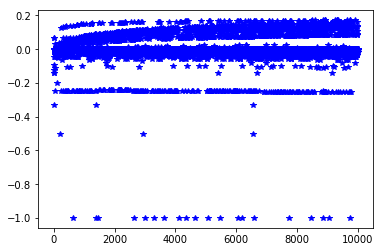

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(times[:],values[:],'b*')
plt.show()
